In [ ]:
import pandas as pd

In [ ]:
true = pd.read_csv('true_news.csv')

In [ ]:
true.head(3)

,title,text,subject,date
0,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,"Tulsi Gabbard, the first Hindu lawmaker from H...",news,13-11-2018
1,Swami Vivekananda’s 156th Birth Anniversary 20...,Swami Vivekananda ranks among the highest in t...,news,03-07-2018
2,Rift Between CBI Chief & Special Director: Thi...,"In the news for the wrong reasons, the Central...",news,18-07-2018


In [ ]:
true.shape

(1999, 4)

In [ ]:
fake = pd.read_csv('fake1.csv')
fake.shape

(41, 4)

In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
frames = [true.loc[:500][:], fake.loc[:500][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(542, 5)

In [ ]:
df.tail()

,title,text,subject,date,label
36,Sharad Pawar falls victim to fake news & Yechu...,Nationalist Congress Party chief Sharad Pawar ...,news,29-11-2018,0
37,"Maharashtra actor, student arrested over posts...",A Marathi actor and a pharmaceutical student i...,news,30-11-2018,0
38,Sharad Pawar Called Himself ‘Baap’ Of Hindu Go...,"A video, where the NCP supremo Sharad Pawar pu...",news,29-11-2018,0
39,One held for impersonating Sharad Pawar and ma...,"In a bizarre development, two persons allegedl...",news,28-11-2018,0
40,"Sharad Pawar intervenes, says MSRTC strike has...",Stating that commuters across Maharashtra had ...,news,29-11-2018,0


In [ ]:
X = df. drop('label', axis=1)
y = df['label']

In [ ]:
df = df.dropna()
df2 = df.copy()

In [ ]:
df2.head()

,title,text,subject,date,label
0,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,"Tulsi Gabbard, the first Hindu lawmaker from H...",news,13-11-2018,1
1,Swami Vivekananda’s 156th Birth Anniversary 20...,Swami Vivekananda ranks among the highest in t...,news,03-07-2018,1
2,Rift Between CBI Chief & Special Director: Thi...,"In the news for the wrong reasons, the Central...",news,18-07-2018,1
3,The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,Reminiscing about the past is a dreadful tool ...,news,14-05-2018,1
4,Tandoor Murder: Former Delhi Police Joint Comm...,: Akanksha Kumar : Sandeep Suman Twenty-three ...,news,30-04-2018,1


In [ ]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,"Tulsi Gabbard, the first Hindu lawmaker from H...",news,13-11-2018,1
1,1,Swami Vivekananda’s 156th Birth Anniversary 20...,Swami Vivekananda ranks among the highest in t...,news,03-07-2018,1
2,2,Rift Between CBI Chief & Special Director: Thi...,"In the news for the wrong reasons, the Central...",news,18-07-2018,1
3,3,The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,Reminiscing about the past is a dreadful tool ...,news,14-05-2018,1
4,4,Tandoor Murder: Former Delhi Police Joint Comm...,: Akanksha Kumar : Sandeep Suman Twenty-three ...,news,30-04-2018,1


In [ ]:
df2['title'][2]

'Rift Between CBI Chief & Special Director: This Internal Tussle Will Continue Until Govt Allows for Independent Functioning'

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.982


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


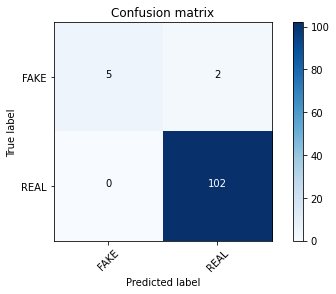

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][30])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'social media abuzz fake poster delhi chief minist arvind kejriw congratul peopl nation capit instal speed bump post share mani user microblog site twitter includ verifi account mock aam aadmi parti leader promot someth insignific instal speed breaker viral imag hindi quot photo arvind kejriw read congratul speed breaker made near sagarpur sabji mandi bharatiya janata parti bjp nation spokesperson gaurav bhatia share post ask speed breaker dig kejriw post like peopl'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
classifier.predict(val)

array([0])

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open('model2.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [ ]:
val_pkl = joblib_vect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([0])